# Import data and libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk as nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('stopwords')
nltk.download('words')
nltk.download('vader_lexicon')
from nltk.tokenize import word_tokenize

df = pd.read_csv('/content/drive/MyDrive/amazon_data/amazon.csv')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


# Overview

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1377 entries, 0 to 1376
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1377 non-null   object 
 1   product_name         1377 non-null   object 
 2   category             1377 non-null   object 
 3   about_product        1377 non-null   object 
 4   discounted_price     1377 non-null   float64
 5   actual_price         1377 non-null   float64
 6   discount_percentage  1377 non-null   float64
 7   review_title         1377 non-null   object 
 8   review_content       1377 non-null   object 
 9   rating               1377 non-null   float64
 10  rating_count         1377 non-null   int64  
 11  score_rating         1377 non-null   object 
 12  main_category        1377 non-null   object 
 13  sub_category         1377 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 150.7+ KB


In [ ]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1377.000000,1377.000000,1377.000000,1377.000000,1377.00000
mean,3259.797509,5631.194103,0.468700,4.092302,17729.73711
std,7114.358064,11126.142360,0.217634,0.293558,41889.20079
min,39.000000,39.000000,0.000000,2.000000,2.00000
25%,349.000000,899.000000,0.310000,3.900000,1161.00000
50%,889.000000,1775.000000,0.490000,4.100000,4959.00000
75%,2148.000000,4500.000000,0.630000,4.300000,16680.00000
max,77990.000000,139900.000000,0.940000,5.000000,426973.00000


In [ ]:
df.head()

,product_id,product_name,category,about_product,discounted_price,actual_price,discount_percentage,review_title,review_content,rating,rating_count,score_rating,main_category,sub_category
0,B07WKBD37W,ESnipe Mart Worldwide Travel Adapter with Buil...,HomeImprovement|Electrical|Adapters&Multi-Outlets,[SLOW CHARGING] Input: 100-240W / Output: 100-...,425.0,999.0,0.57,"Material not worth,Stable for use,Overall prod...","I can say costly, although it can do the job,I...",4.0,2581,positivo,HomeImprovement,Electrical
1,B07BKSSDR2,Dr Trust Electronic Kitchen Digital Scale Weig...,Health&PersonalCare|HomeMedicalSupplies&Equipm...,Tare function: It comes with tare function whi...,899.0,1900.0,0.53,"Design Optimised for Functionality, Durability...",This is aesthetically the most appealing Digit...,4.0,3663,positivo,Health&PersonalCare,HomeMedicalSupplies&Equipment
2,B076B8G5D8,Boya ByM1 Auxiliary Omnidirectional Lavalier C...,MusicalInstruments|Microphones|Condenser,"BOYA BY-M1 is an omni directional microphone, ...",798.0,1995.0,0.60,DETAILED REVIEW with Best settings for better ...,"NOTE :@ Its ready to go Mic, which doesn't nee...",4.0,68664,positivo,MusicalInstruments,Microphones
3,B0B2RBP83P,"Lenovo IdeaPad 3 11th Gen Intel Core i3 15.6"" ...",Computers&Accessories|Laptops|TraditionalLaptops,Processor: 11th Gen Intel Core i3-1115G4 | Spe...,37247.0,59890.0,0.38,"Value for money laptop for normal usage,Works ...",If you are looking for a decent laptop and res...,4.0,323,positivo,Computers&Accessories,Laptops
4,B0846D5CBP,Casio FX-991ES Plus-2nd Edition Scientific Cal...,OfficeProducts|OfficeElectronics|Calculators|S...,Redesigned ES PLUS series calculators featurin...,1295.0,1295.0,0.00,"Nice,Good and light calculator,Cheap buttons,G...","It is very easy to use.,Good and easy to use.,...",4.5,5760,positivo,OfficeProducts,OfficeElectronics


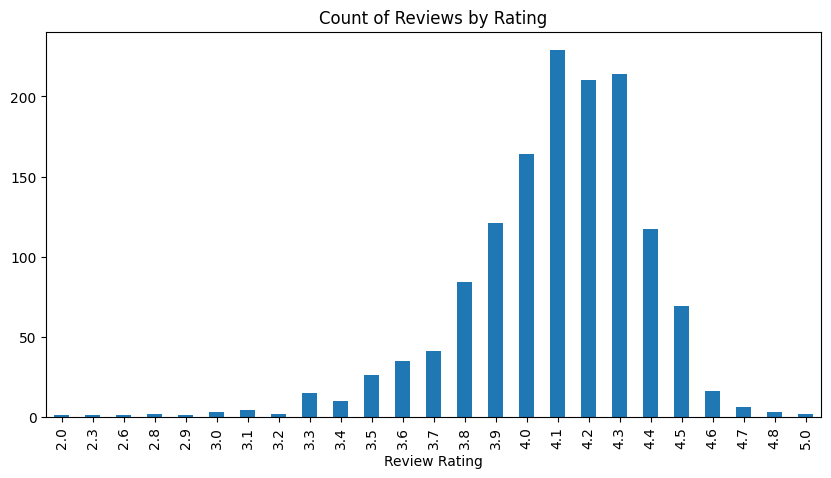

In [ ]:
ax = df['rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Rating',
          figsize=(10, 5))
ax.set_xlabel('Review Rating')
plt.show()

# Tokenization example

In [ ]:
example = df['review_title'][50]
print(example)

Fake Product,Costly but excellent quality,Storage good but don't know how to Activate warantee??,Good for use,5 stas nahi diya kyuki capacity 477gb hi rahta hai,Speed not as advertise,Good one,It's ok


In [ ]:
tokens = nltk.word_tokenize(example,  language='english', preserve_line=True)
tokens[:10]

['Fake',
 'Product',
 ',',
 'Costly',
 'but',
 'excellent',
 'quality',
 ',',
 'Storage',
 'good']

In [ ]:
nltk_tokens = nltk.word_tokenize(example, language='english', preserve_line=True)
print (nltk_tokens)

['Fake', 'Product', ',', 'Costly', 'but', 'excellent', 'quality', ',', 'Storage', 'good', 'but', 'do', "n't", 'know', 'how', 'to', 'Activate', 'warantee', '?', '?', ',', 'Good', 'for', 'use,5', 'stas', 'nahi', 'diya', 'kyuki', 'capacity', '477gb', 'hi', 'rahta', 'hai', ',', 'Speed', 'not', 'as', 'advertise', ',', 'Good', 'one', ',', 'It', "'s", 'ok']


In [ ]:
tagged = nltk.pos_tag(nltk_tokens)
print(tagged)
#tagged[:10]

[('Fake', 'NNP'), ('Product', 'NNP'), (',', ','), ('Costly', 'NNP'), ('but', 'CC'), ('excellent', 'JJ'), ('quality', 'NN'), (',', ','), ('Storage', 'NNP'), ('good', 'JJ'), ('but', 'CC'), ('do', 'VBP'), ("n't", 'RB'), ('know', 'VB'), ('how', 'WRB'), ('to', 'TO'), ('Activate', 'VB'), ('warantee', 'NN'), ('?', '.'), ('?', '.'), (',', ','), ('Good', 'NNP'), ('for', 'IN'), ('use,5', 'JJ'), ('stas', 'NNS'), ('nahi', 'JJ'), ('diya', 'NN'), ('kyuki', 'NN'), ('capacity', 'NN'), ('477gb', 'CD'), ('hi', 'NN'), ('rahta', 'NN'), ('hai', 'NN'), (',', ','), ('Speed', 'NNP'), ('not', 'RB'), ('as', 'IN'), ('advertise', 'NN'), (',', ','), ('Good', 'NNP'), ('one', 'CD'), (',', ','), ('It', 'PRP'), ("'s", 'VBZ'), ('ok', 'JJ')]


In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (PERSON Fake/NNP)
  (ORGANIZATION Product/NNP)
  ,/,
  (PERSON Costly/NNP)
  but/CC
  excellent/JJ
  quality/NN
  ,/,
  (PERSON Storage/NNP)
  good/JJ
  but/CC
  do/VBP
  n't/RB
  know/VB
  how/WRB
  to/TO
  Activate/VB
  warantee/NN
  ?/.
  ?/.
  ,/,
  (PERSON Good/NNP)
  for/IN
  use,5/JJ
  stas/NNS
  nahi/JJ
  diya/NN
  kyuki/NN
  capacity/NN
  477gb/CD
  hi/NN
  rahta/NN
  hai/NN
  ,/,
  (PERSON Speed/NNP)
  not/RB
  as/IN
  advertise/NN
  ,/,
  Good/NNP
  one/CD
  ,/,
  It/PRP
  's/VBZ
  ok/JJ)


# Sentiment Analysis example

In [ ]:
# Vader uses a "bag of words" approach:
# Stop words are removed
# each word is scored and combined to a total score.

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [ ]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [ ]:
sia.polarity_scores(example)

{'neg': 0.052, 'neu': 0.639, 'pos': 0.308, 'compound': 0.9003}

# Sentiment Analysis using VADER (Valence Aware Dictionary and sEntiment Reasoner)

In [ ]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['review_title']
    myid = row['product_id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/1377 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'product_id'})
vaders = vaders.merge(df, how='left')

In [ ]:
# Now we have sentiment score and metadata
vaders.head()

,product_id,neg,neu,pos,compound,product_name,category,about_product,discounted_price,actual_price,discount_percentage,review_title,review_content,rating,rating_count,score_rating,main_category,sub_category
0,B07WKBD37W,0.000,0.868,0.132,0.4404,ESnipe Mart Worldwide Travel Adapter with Buil...,HomeImprovement|Electrical|Adapters&Multi-Outlets,[SLOW CHARGING] Input: 100-240W / Output: 100-...,425.0,999.0,0.57,"Material not worth,Stable for use,Overall prod...","I can say costly, although it can do the job,I...",4.0,2581,positivo,HomeImprovement,Electrical
1,B07BKSSDR2,0.081,0.773,0.147,0.3937,Dr Trust Electronic Kitchen Digital Scale Weig...,Health&PersonalCare|HomeMedicalSupplies&Equipm...,Tare function: It comes with tare function whi...,899.0,1900.0,0.53,"Design Optimised for Functionality, Durability...",This is aesthetically the most appealing Digit...,4.0,3663,positivo,Health&PersonalCare,HomeMedicalSupplies&Equipment
2,B076B8G5D8,0.000,0.779,0.221,0.9198,Boya ByM1 Auxiliary Omnidirectional Lavalier C...,MusicalInstruments|Microphones|Condenser,"BOYA BY-M1 is an omni directional microphone, ...",798.0,1995.0,0.60,DETAILED REVIEW with Best settings for better ...,"NOTE :@ Its ready to go Mic, which doesn't nee...",4.0,68664,positivo,MusicalInstruments,Microphones
3,B0B2RBP83P,0.101,0.691,0.207,0.3182,"Lenovo IdeaPad 3 11th Gen Intel Core i3 15.6"" ...",Computers&Accessories|Laptops|TraditionalLaptops,Processor: 11th Gen Intel Core i3-1115G4 | Spe...,37247.0,59890.0,0.38,"Value for money laptop for normal usage,Works ...",If you are looking for a decent laptop and res...,4.0,323,positivo,Computers&Accessories,Laptops
4,B0846D5CBP,0.000,0.756,0.244,0.4404,Casio FX-991ES Plus-2nd Edition Scientific Cal...,OfficeProducts|OfficeElectronics|Calculators|S...,Redesigned ES PLUS series calculators featurin...,1295.0,1295.0,0.00,"Nice,Good and light calculator,Cheap buttons,G...","It is very easy to use.,Good and easy to use.,...",4.5,5760,positivo,OfficeProducts,OfficeElectronics


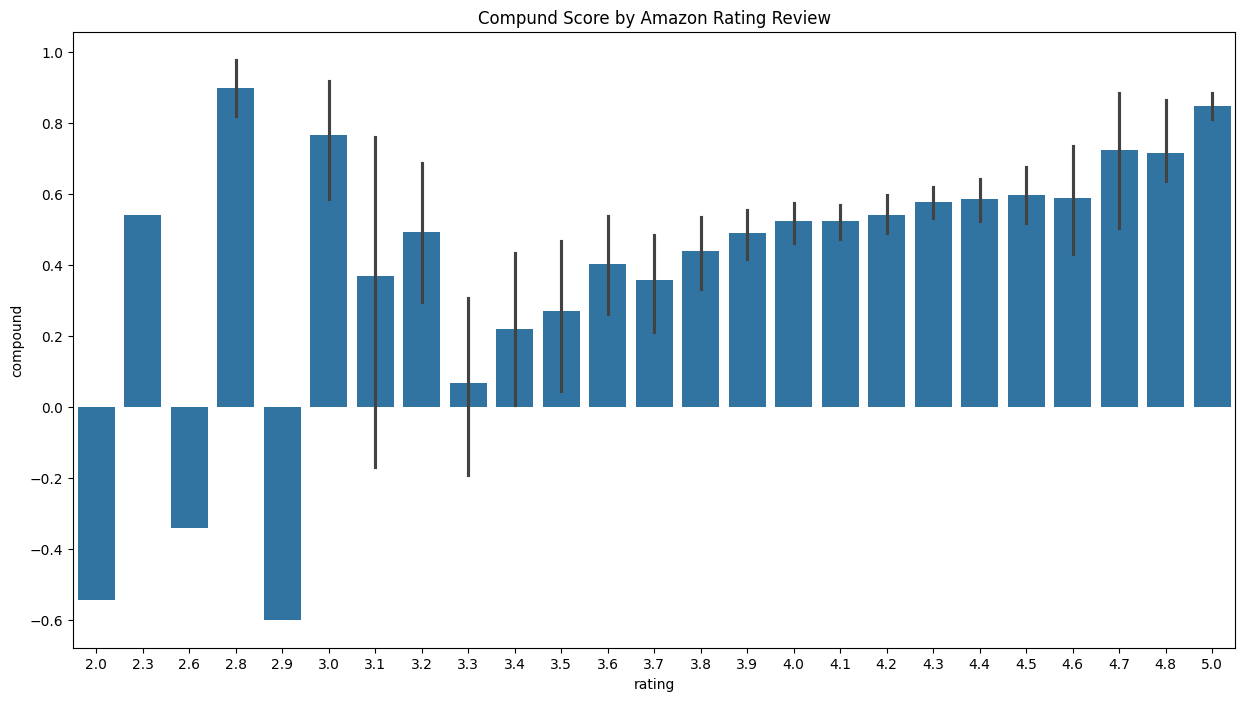

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=vaders, x='rating', y='compound')
ax.set_title('Compund Score by Amazon Rating Review')
plt.show()

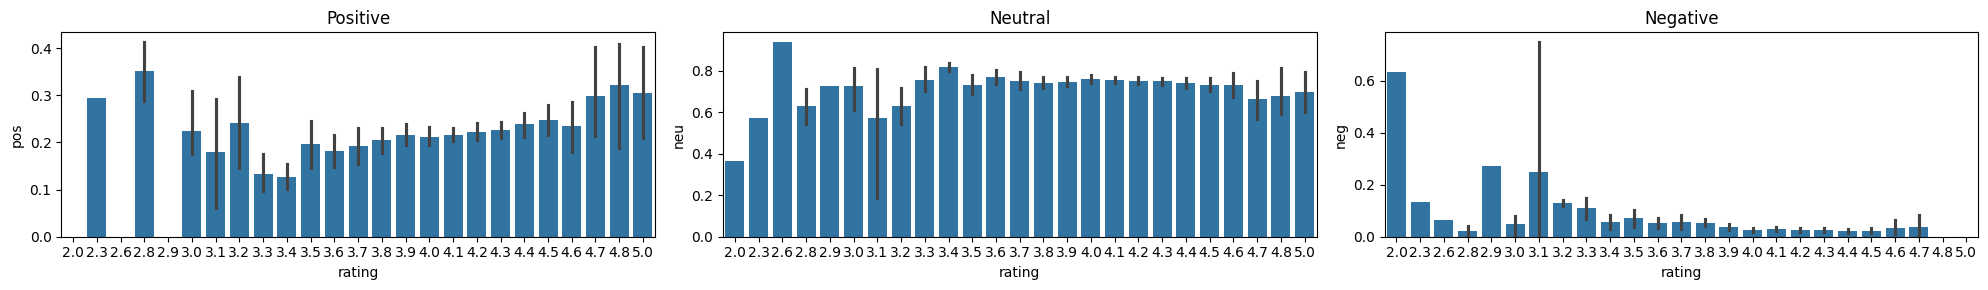

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 3))
sns.barplot(data=vaders, x='rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# RoBERTa and AutoTokenizer

In [ ]:
# Use a model trained of a large corpus of data.
# Transformer model accounts for the words but also the context related to other words.

from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
# VADER results on example
print(example)
sia.polarity_scores(example)

Fake Product,Costly but excellent quality,Storage good but don't know how to Activate warantee??,Good for use,5 stas nahi diya kyuki capacity 477gb hi rahta hai,Speed not as advertise,Good one,It's ok


{'neg': 0.052, 'neu': 0.639, 'pos': 0.308, 'compound': 0.9003}

In [ ]:
# Run for Roberta Model in example
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.21903612, 'roberta_neu': 0.40000266, 'roberta_pos': 0.3809612}


In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
# Run for complete dataframe
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['review_title']
        myid = row['product_id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/1377 [00:00<?, ?it/s]

In [ ]:
# Add results to dataframe
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'product_id'})
results_df = results_df.merge(df, how='left')

In [ ]:
results_df.columns

Index(['product_id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'product_name', 'category',
       'about_product', 'discounted_price', 'actual_price',
       'discount_percentage', 'review_title', 'review_content', 'rating',
       'rating_count', 'score_rating', 'main_category', 'sub_category'],
      dtype='object')

# Comparison between models

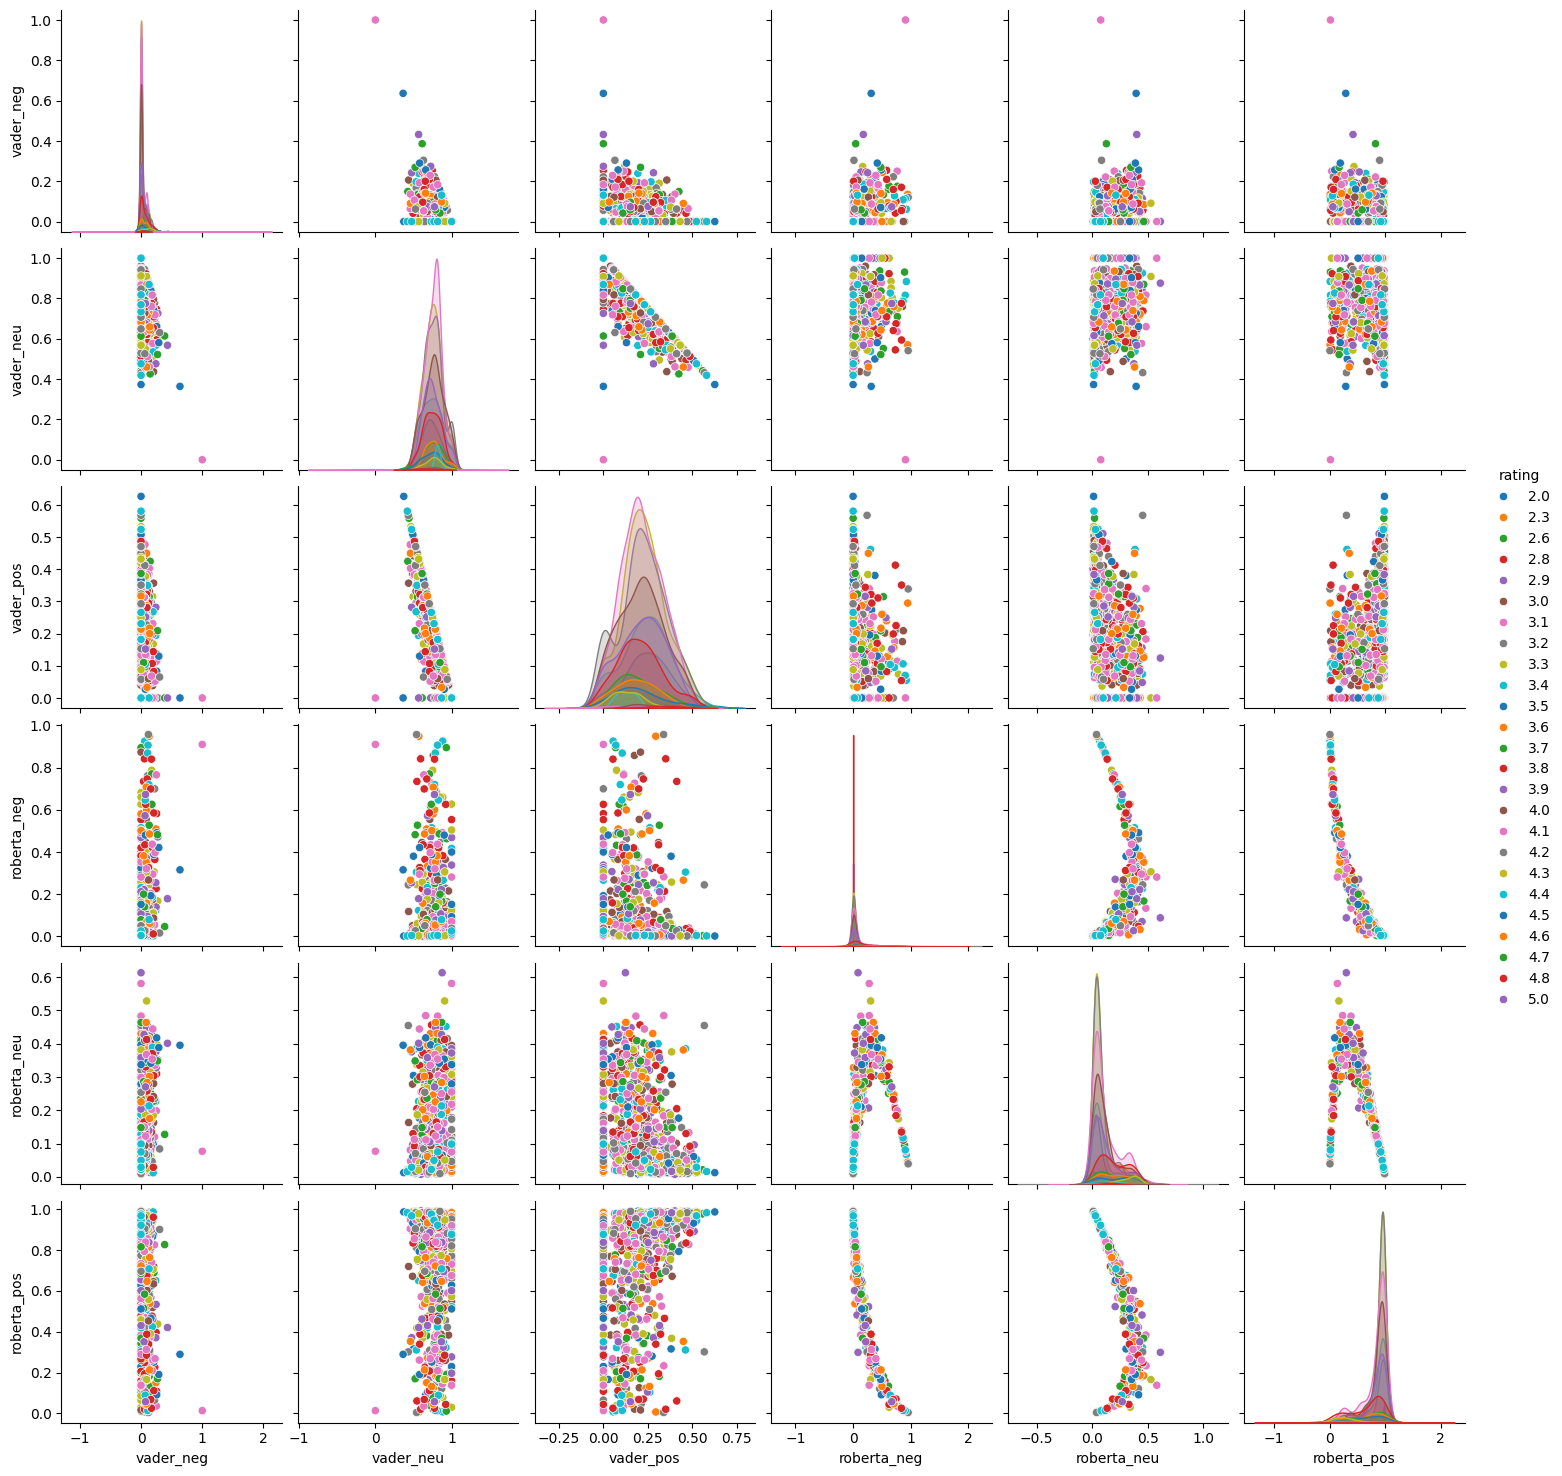

In [ ]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='rating',
            palette='tab10')
plt.show()

In [ ]:
# Check  an example
results_df.query('rating == 4').sort_values('roberta_pos', ascending=False)['review_title'].values[0]
#results_df.info()

'Value-for-money,Worth to buy,Good product bass bhi achha hai,This is AWESOME,Nice earphone, India should also make like this,Good earphone comfortable feel, microphones, sound, calling.,It’s good build quality,I just love this. Amezing sound quality'

# Using pipelines to get a score from pretrained roBERTa model

In [ ]:
# This model is a fine-tune checkpoint of DistilBERT-base-uncased, fine-tuned on SST-2. This model reaches an accuracy of 91.3 on the dev set.
# Since this an roBERTa are built with a BERT base, from hugging-face documentation: It builds on BERT and modifies key hyperparameters, removing the next-sentence pretraining objective and training with much larger mini-batches and learning rates.
# We are going to also compare this results

from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
# Positive example
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [ ]:
# Negative example
sent_pipeline('I hate eggs!')

[{'label': 'NEGATIVE', 'score': 0.9992945194244385}]

In [ ]:
# Run the polarity score on the entire dataset
result = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['review_title']
    myid = row['product_id']
    result[myid] = sent_pipeline(text)

  0%|          | 0/1377 [00:00<?, ?it/s]

In [ ]:
roberta = pd.DataFrame(result).T
roberta = roberta.reset_index().rename(columns={'index': 'product_id'})
roberta = roberta.merge(results_df, how='left')

In [ ]:
# Now we have sentiment score and metadata
roberta.rename(columns={0: 'pipeline_result'}, inplace=True)
roberta.head()

,product_id,pipeline_result,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,product_name,...,discounted_price,actual_price,discount_percentage,review_title,review_content,rating,rating_count,score_rating,main_category,sub_category
0,B07WKBD37W,"{'label': 'POSITIVE', 'score': 0.9987370371818...",0.000,0.868,0.132,0.4404,0.032950,0.129786,0.837264,ESnipe Mart Worldwide Travel Adapter with Buil...,...,425.0,999.0,0.57,"Material not worth,Stable for use,Overall prod...","I can say costly, although it can do the job,I...",4.0,2581,positivo,HomeImprovement,Electrical
1,B07BKSSDR2,"{'label': 'NEGATIVE', 'score': 0.6010748744010...",0.081,0.773,0.147,0.3937,0.009811,0.088855,0.901333,Dr Trust Electronic Kitchen Digital Scale Weig...,...,899.0,1900.0,0.53,"Design Optimised for Functionality, Durability...",This is aesthetically the most appealing Digit...,4.0,3663,positivo,Health&PersonalCare,HomeMedicalSupplies&Equipment
2,B076B8G5D8,"{'label': 'POSITIVE', 'score': 0.6538318991661...",0.000,0.779,0.221,0.9198,0.022224,0.148497,0.829279,Boya ByM1 Auxiliary Omnidirectional Lavalier C...,...,798.0,1995.0,0.60,DETAILED REVIEW with Best settings for better ...,"NOTE :@ Its ready to go Mic, which doesn't nee...",4.0,68664,positivo,MusicalInstruments,Microphones
3,B0B2RBP83P,"{'label': 'POSITIVE', 'score': 0.9983396530151...",0.101,0.691,0.207,0.3182,0.006820,0.056625,0.936554,"Lenovo IdeaPad 3 11th Gen Intel Core i3 15.6"" ...",...,37247.0,59890.0,0.38,"Value for money laptop for normal usage,Works ...",If you are looking for a decent laptop and res...,4.0,323,positivo,Computers&Accessories,Laptops
4,B0846D5CBP,"{'label': 'POSITIVE', 'score': 0.9995718598365...",0.000,0.756,0.244,0.4404,0.002491,0.019932,0.977578,Casio FX-991ES Plus-2nd Edition Scientific Cal...,...,1295.0,1295.0,0.00,"Nice,Good and light calculator,Cheap buttons,G...","It is very easy to use.,Good and easy to use.,...",4.5,5760,positivo,OfficeProducts,OfficeElectronics


In [ ]:
roberta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1377 entries, 0 to 1376
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1377 non-null   object 
 1   pipeline_result      1377 non-null   object 
 2   vader_neg            1377 non-null   float64
 3   vader_neu            1377 non-null   float64
 4   vader_pos            1377 non-null   float64
 5   vader_compound       1377 non-null   float64
 6   roberta_neg          1377 non-null   float64
 7   roberta_neu          1377 non-null   float64
 8   roberta_pos          1377 non-null   float64
 9   product_name         1377 non-null   object 
 10  category             1377 non-null   object 
 11  about_product        1377 non-null   object 
 12  discounted_price     1377 non-null   float64
 13  actual_price         1377 non-null   float64
 14  discount_percentage  1377 non-null   float64
 15  review_title         1377 non-null   o

# Organizing the data


In [ ]:
# New category based on vader compund (-1 to -0,1875 is negative, -0,1875 to 0,1875 is neutral, and 0,1875 to 1 is positive)

conditions = [
    (roberta['vader_compound'] < -0.1875),
    (roberta['vader_compound'] >= -0.1875) & (roberta['vader_compound'] <= 0.1875),
    (roberta['vader_compound'] > 0.1875)
    ]

# create a list of the values we want to assign for each condition
values = ['negativo', 'neutral', 'positivo']

# create a new column and use np.select to assign values to it using our lists as arguments
roberta['vader_category'] = np.select(conditions, values)

# display updated DataFrame
roberta.head()

,product_id,pipeline_result,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,product_name,...,actual_price,discount_percentage,review_title,review_content,rating,rating_count,score_rating,main_category,sub_category,vader_category
0,B07WKBD37W,"{'label': 'POSITIVE', 'score': 0.9987370371818...",0.000,0.868,0.132,0.4404,0.032950,0.129786,0.837264,ESnipe Mart Worldwide Travel Adapter with Buil...,...,999.0,0.57,"Material not worth,Stable for use,Overall prod...","I can say costly, although it can do the job,I...",4.0,2581,positivo,HomeImprovement,Electrical,positivo
1,B07BKSSDR2,"{'label': 'NEGATIVE', 'score': 0.6010748744010...",0.081,0.773,0.147,0.3937,0.009811,0.088855,0.901333,Dr Trust Electronic Kitchen Digital Scale Weig...,...,1900.0,0.53,"Design Optimised for Functionality, Durability...",This is aesthetically the most appealing Digit...,4.0,3663,positivo,Health&PersonalCare,HomeMedicalSupplies&Equipment,positivo
2,B076B8G5D8,"{'label': 'POSITIVE', 'score': 0.6538318991661...",0.000,0.779,0.221,0.9198,0.022224,0.148497,0.829279,Boya ByM1 Auxiliary Omnidirectional Lavalier C...,...,1995.0,0.60,DETAILED REVIEW with Best settings for better ...,"NOTE :@ Its ready to go Mic, which doesn't nee...",4.0,68664,positivo,MusicalInstruments,Microphones,positivo
3,B0B2RBP83P,"{'label': 'POSITIVE', 'score': 0.9983396530151...",0.101,0.691,0.207,0.3182,0.006820,0.056625,0.936554,"Lenovo IdeaPad 3 11th Gen Intel Core i3 15.6"" ...",...,59890.0,0.38,"Value for money laptop for normal usage,Works ...",If you are looking for a decent laptop and res...,4.0,323,positivo,Computers&Accessories,Laptops,positivo
4,B0846D5CBP,"{'label': 'POSITIVE', 'score': 0.9995718598365...",0.000,0.756,0.244,0.4404,0.002491,0.019932,0.977578,Casio FX-991ES Plus-2nd Edition Scientific Cal...,...,1295.0,0.00,"Nice,Good and light calculator,Cheap buttons,G...","It is very easy to use.,Good and easy to use.,...",4.5,5760,positivo,OfficeProducts,OfficeElectronics,positivo


In [ ]:
# New category from the label of pipeline_result
# Extract the label from pipeline_result
def extract_label(dictionary):
    return dictionary['label']

# Create new column
roberta['pipeline_category'] = roberta['pipeline_result'].apply(extract_label).str.lower()

# display
roberta.head()

,product_id,pipeline_result,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,product_name,...,discount_percentage,review_title,review_content,rating,rating_count,score_rating,main_category,sub_category,vader_category,pipeline_category
0,B07WKBD37W,"{'label': 'POSITIVE', 'score': 0.9987370371818...",0.000,0.868,0.132,0.4404,0.032950,0.129786,0.837264,ESnipe Mart Worldwide Travel Adapter with Buil...,...,0.57,"Material not worth,Stable for use,Overall prod...","I can say costly, although it can do the job,I...",4.0,2581,positivo,HomeImprovement,Electrical,positivo,positive
1,B07BKSSDR2,"{'label': 'NEGATIVE', 'score': 0.6010748744010...",0.081,0.773,0.147,0.3937,0.009811,0.088855,0.901333,Dr Trust Electronic Kitchen Digital Scale Weig...,...,0.53,"Design Optimised for Functionality, Durability...",This is aesthetically the most appealing Digit...,4.0,3663,positivo,Health&PersonalCare,HomeMedicalSupplies&Equipment,positivo,negative
2,B076B8G5D8,"{'label': 'POSITIVE', 'score': 0.6538318991661...",0.000,0.779,0.221,0.9198,0.022224,0.148497,0.829279,Boya ByM1 Auxiliary Omnidirectional Lavalier C...,...,0.60,DETAILED REVIEW with Best settings for better ...,"NOTE :@ Its ready to go Mic, which doesn't nee...",4.0,68664,positivo,MusicalInstruments,Microphones,positivo,positive
3,B0B2RBP83P,"{'label': 'POSITIVE', 'score': 0.9983396530151...",0.101,0.691,0.207,0.3182,0.006820,0.056625,0.936554,"Lenovo IdeaPad 3 11th Gen Intel Core i3 15.6"" ...",...,0.38,"Value for money laptop for normal usage,Works ...",If you are looking for a decent laptop and res...,4.0,323,positivo,Computers&Accessories,Laptops,positivo,positive
4,B0846D5CBP,"{'label': 'POSITIVE', 'score': 0.9995718598365...",0.000,0.756,0.244,0.4404,0.002491,0.019932,0.977578,Casio FX-991ES Plus-2nd Edition Scientific Cal...,...,0.00,"Nice,Good and light calculator,Cheap buttons,G...","It is very easy to use.,Good and easy to use.,...",4.5,5760,positivo,OfficeProducts,OfficeElectronics,positivo,positive


# Check if review is AI or Human generated using GPTZero

In [ ]:
# Get one string

text = roberta['review_title'].values[1]

print(text)

Design Optimised for Functionality, Durability & Battery life!,Nice,**HIGHLY PRECISE IN MEASURING**ACCU GAUGE SENSORS**CONVERTS UNIT AFTER MEASURING ALSO**HAS TARE, AUTO-OFF, OVERLOAD INDICATOR**,It worked good for one year. Now only grams are shown.litres option is not operated.


In [ ]:
# API request

import http.client

conn = http.client.HTTPSConnection("api.gptzero.me")

document = text

# payload = "{\n  \"document\": \"string\",\n  \"version\": \"2024-01-09\"\n}"
payload = f'{{\n  "document": "{document}",\n  "version": "2024-01-09"\n}}'


headers = {
    'x-api-key': "",
    'Content-Type': "application/json",
    'Accept': "application/json"
}

conn.request("POST", "/v2/predict/text", payload, headers)

res = conn.getresponse()
data = res.read()

print(data.decode("utf-8"))

{"version":"2024-01-09","documents":[{"average_generated_prob":0,"class_probabilities":{"ai":0.00005442018896627028,"human":0.9972939607051338,"mixed":0.002651619105899927},"completely_generated_prob":0.0013258095529499634,"confidence_category":"high","confidence_score":0.9628556691480599,"confidence_scores_raw":{"softmax":{"ai":0.00005442018896627028,"human":0.9972939607051338,"mixed":0.002651619105899927}},"confidence_thresholds_raw":{"softmax":{"ai":{"low":0.2500408713258266,"medium":0.7500108282798076,"reject":0.0829235360196047},"human":{"low":0.2500408713258266,"medium":0.7500108282798076,"reject":0.0829235360196047},"mixed":{"low":0.25005905002137835,"medium":0.7499982093942428,"reject":0.06218595116691931}}},"metrics_per_class":{"ai":{"high":{"accuracy":0.9933733038813506},"low":{"accuracy":0.8646616541353384},"medium":{"accuracy":0.9510086455331412},"reject":{"accuracy":0.40963855421686746}},"human":{"high":{"accuracy":0.996798463262366},"low":{"accuracy":0.8514056224899599},"

In [ ]:
# Get other string

text2 = roberta['review_title'].values[4]

print(text2)

Nice,Good and light calculator,Cheap buttons,Good calculator,Good product thanks Amazon,Super dealing,Function,Ok


In [ ]:
# API request

import http.client

conn = http.client.HTTPSConnection("api.gptzero.me")

document = text2

payload = f'{{\n  "document": "{document}",\n  "version": "2024-01-09"\n}}'

headers = {
    'x-api-key': "",
    'Content-Type': "application/json",
    'Accept': "application/json"
}

conn.request("POST", "/v2/predict/text", payload, headers)

res = conn.getresponse()
data = res.read()

print(data.decode("utf-8"))

{"version":"2024-01-09","documents":[{"average_generated_prob":0,"class_probabilities":{"ai":0.00005272617468576403,"human":0.9563344021747107,"mixed":0.04361287165060354},"completely_generated_prob":0.02180643582530177,"confidence_category":"high","confidence_score":0.8657983651873742,"confidence_scores_raw":{"softmax":{"ai":0.00005272617468576403,"human":0.9563344021747107,"mixed":0.04361287165060354}},"confidence_thresholds_raw":{"softmax":{"ai":{"low":0.2500408713258266,"medium":0.7500108282798076,"reject":0.0829235360196047},"human":{"low":0.2500408713258266,"medium":0.7500108282798076,"reject":0.0829235360196047},"mixed":{"low":0.25005905002137835,"medium":0.7499982093942428,"reject":0.06218595116691931}}},"metrics_per_class":{"ai":{"high":{"accuracy":0.9933733038813506},"low":{"accuracy":0.8646616541353384},"medium":{"accuracy":0.9510086455331412},"reject":{"accuracy":0.40963855421686746}},"human":{"high":{"accuracy":0.996798463262366},"low":{"accuracy":0.8514056224899599},"medi

# WordCloud


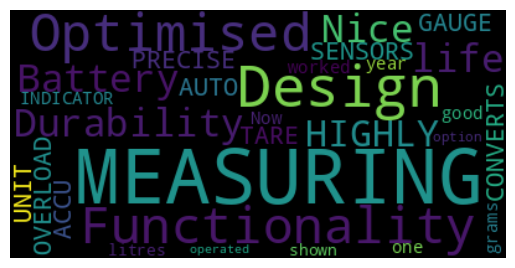

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Start with one review:
words = text

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

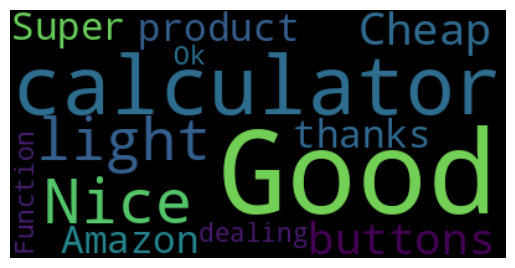

In [ ]:
# Start with one review:
words = text2

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
roberta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1377 entries, 0 to 1376
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1377 non-null   object 
 1   pipeline_result      1377 non-null   object 
 2   vader_neg            1377 non-null   float64
 3   vader_neu            1377 non-null   float64
 4   vader_pos            1377 non-null   float64
 5   vader_compound       1377 non-null   float64
 6   roberta_neg          1377 non-null   float64
 7   roberta_neu          1377 non-null   float64
 8   roberta_pos          1377 non-null   float64
 9   product_name         1377 non-null   object 
 10  category             1377 non-null   object 
 11  about_product        1377 non-null   object 
 12  discounted_price     1377 non-null   float64
 13  actual_price         1377 non-null   float64
 14  discount_percentage  1377 non-null   float64
 15  review_title         1377 non-null   o

In [ ]:
roberta['score_rating'] = roberta['score_rating'].astype('string')

In [ ]:
roberta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1377 entries, 0 to 1376
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1377 non-null   object 
 1   pipeline_result      1377 non-null   object 
 2   vader_neg            1377 non-null   float64
 3   vader_neu            1377 non-null   float64
 4   vader_pos            1377 non-null   float64
 5   vader_compound       1377 non-null   float64
 6   roberta_neg          1377 non-null   float64
 7   roberta_neu          1377 non-null   float64
 8   roberta_pos          1377 non-null   float64
 9   product_name         1377 non-null   object 
 10  category             1377 non-null   object 
 11  about_product        1377 non-null   object 
 12  discounted_price     1377 non-null   float64
 13  actual_price         1377 non-null   float64
 14  discount_percentage  1377 non-null   float64
 15  review_title         1377 non-null   o

In [ ]:
roberta['review_title'] = roberta['review_title'].astype('string')

In [ ]:
roberta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1377 entries, 0 to 1376
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1377 non-null   object 
 1   pipeline_result      1377 non-null   object 
 2   vader_neg            1377 non-null   float64
 3   vader_neu            1377 non-null   float64
 4   vader_pos            1377 non-null   float64
 5   vader_compound       1377 non-null   float64
 6   roberta_neg          1377 non-null   float64
 7   roberta_neu          1377 non-null   float64
 8   roberta_pos          1377 non-null   float64
 9   product_name         1377 non-null   object 
 10  category             1377 non-null   object 
 11  about_product        1377 non-null   object 
 12  discounted_price     1377 non-null   float64
 13  actual_price         1377 non-null   float64
 14  discount_percentage  1377 non-null   float64
 15  review_title         1377 non-null   s

In [ ]:
# Now make wordclouds for each sentiment: positive, neutral and negative using score_rating, a value based in star rating

# Create an empty list
positive_list =[]
neutral_list =[]
negative_list =[]


# Iterate over each row
for index, rows in roberta.iterrows():
  if roberta['score_rating'][index] == 'positivo':
    new_positive_list =[rows.review_title]
    positive_list.extend(new_positive_list)
  elif roberta['score_rating'][index] == 'neutral':
     new_neutral_list =[rows.review_title]
     neutral_list.extend(new_neutral_list)
  else:
     new_negative_list =[rows.review_title]
     negative_list.extend(new_negative_list)

# Print the list
print(negative_list)


['Very Good prodat,Battery life is 0 day,Good,Where is switch on button?,Saman kharab hai,Do not purchase totally waste of time and money.,Bhot Gandhi h ye watch,Good 👍 nice', "Stop working after few days,Ok. Changing every 4 months toomuch,Tap filter,Quality,Doesn't purify water,Very good product,REALLY GOOD!,Bad", 'It is broken,Could have been a bit better,The first one was not working and the replacement was sent without box with a used piece,Super cool,Great,Product does not work,Product was not too good it only seal normal thin polybag,Good. Works', 'Nice product i recommend to buy,Do not buy!! Defective product,Wast of money,Very very bad portable,Waste of money its not working properly', "Portable but not much powerful,not so good. power back up is very poor.its more like a toy for my 9 years old girl.,500 rs ok,Don't be fooled by ratings, not a good product,Not recommended,Worst Battery, no use,It is affordable .,User friendly blender, Recommended to buy nice products", 'Bad qu

Very Good prodat,Battery life is 0 day,Good,Where is switch on button?,Saman kharab hai,Do not purchase totally waste of time and money.,Bhot Gandhi h ye watch,Good 👍 niceStop working after few days,Ok. Changing every 4 months toomuch,Tap filter,Quality,Doesn't purify water,Very good product,REALLY GOOD!,BadIt is broken,Could have been a bit better,The first one was not working and the replacement was sent without box with a used piece,Super cool,Great,Product does not work,Product was not too good it only seal normal thin polybag,Good. WorksNice product i recommend to buy,Do not buy!! Defective product,Wast of money,Very very bad portable,Waste of money its not working properlyPortable but not much powerful,not so good. power back up is very poor.its more like a toy for my 9 years old girl.,500 rs ok,Don't be fooled by ratings, not a good product,Not recommended,Worst Battery, no use,It is affordable .,User friendly blender, Recommended to buy nice productsBad quality,Amazing product.

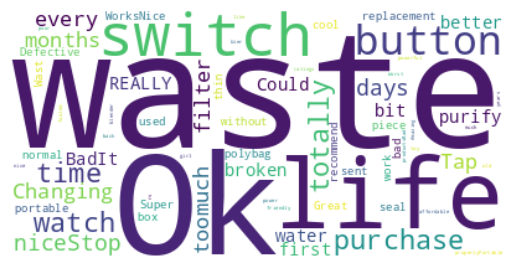

In [ ]:
# Generate a word cloud image
text=''.join(negative_list)
print(text)

# stopwords = set(STOPWORDS)
# stopwords.update(["product", "good", "money"])

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

stop_words.update(["product", "good", "money", "working", "buy", "quality", "day", "use", "naadd", "Saman", "Gandhi", "hai", "kharab", "cable", "prodat", "netflix", "Battery", "ye", "phone", "h", "Bhot", "vfm", "one", "con", "bht", "egg", "firestick", "ifalcon", "recommended", "osmvery"])


wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Material not worth,Stable for use,Overall product is good,Durable, travel friendly,Adapter,Useful product for international travellers,Doubtful for Durability and sturdiness,very good productDesign Optimised for Functionality, Durability & Battery life!,Nice,**HIGHLY PRECISE IN MEASURING**ACCU GAUGE SENSORS**CONVERTS UNIT AFTER MEASURING ALSO**HAS TARE, AUTO-OFF, OVERLOAD INDICATOR**,It worked good for one year. Now only grams are shown.litres option is not operated.DETAILED REVIEW with Best settings for better Sound output !!!,Worth if you know how to use and what to use it for.,Good for non-professional recordings,Buy this and start creating content for your youtube.,Long cable should be optional.... it's too long else good mic for beginners on YT,Working as expected,Nice product,Good 👍Value for money laptop for normal usage,Works well, no issues,Worth it,RAM upgradability an issue,Value for Money,Kopalli,Excellent product....worth it...,Battery 3 hNice,Good and light calculator,Chea

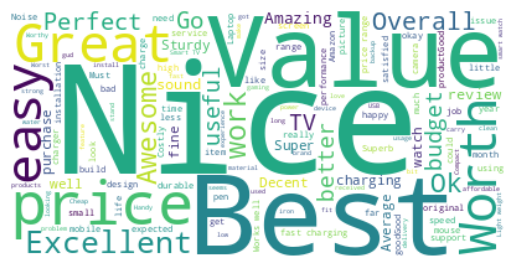

In [ ]:
# Generate a word cloud image
text=''.join(positive_list)
print(text)

wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Liked it,User friendly and effective,Not as per expected,Worth buying for cars which doesn't have inbuilt filter,It works really well...AX30MAX is what we all need..!!,Air purification is awesome,Excelent product for the Prize you pay,Dont expect muchloud & clear,Avrage in budget range,Best for beginners,Good for price,Very nice mic in this price range,In budget,Product Good, Packaging damaged.,Gzzzbbbbb mic 🎤Thik thak he,wired,Sound boss,cheap and best temporary speakers,So loud,Bass,BEST QUALITY SPEAKER,Very niceTo good,Build material,Super,Good product,Budget bluetooth speaker which serves the purpose of low volume on a phone or laptop,best,It's OK to use in small room. But for Outdoor activities it will not meet our expectations.,Awesome productAwesome sound, but FM is not clear,Good Product!,Guarantee Nahin de rahi hai kharabi hai,It's nice worth for rate,Good product,sufficient sound clarity and connectivity,Sound is best bass is best 👍💯,Good 👍Saunde quality is assumed,Value for 

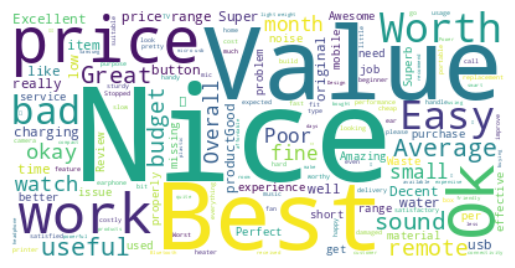

In [ ]:
# Generate a word cloud image
text=''.join(neutral_list)
print(text)

wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# roberta.to_csv("complete_amazon.csv", index=False)

# from google.colab import files
# files.download("complete_amazon.csv")

# Confusion Matrix

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import metrics as skmetrics

df_dum = pd.read_csv('/content/drive/MyDrive/bq-results-20240208-183923-1707418127378/complete_with_dummies.csv')

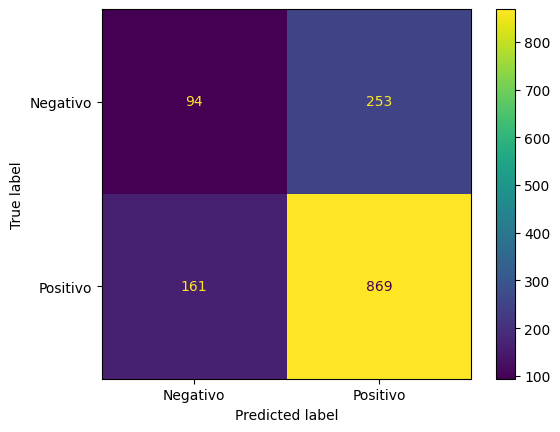

{'Accuracy': 0.6993464052287581, 'Precision': 0.7745098039215687, 'Sensitivity_recall': 0.8436893203883495, 'Specificity': 0.27089337175792505, 'F1_score': 0.8076208178438663}


In [ ]:
# Score_rating vs Vader

# Generar datos de ejemplo de etiquetas reales y predichas
actual = df_dum['score_dummy']
predicted = df_dum['vader_dummy']

# Crear la matriz de confusión utilizando sklearn
confusion_matrix = metrics.confusion_matrix(actual, predicted)

# Crear la visualización de la matriz de confusión
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Negativo", "Positivo"])

# Graficar la matriz de confusión
cm_display.plot()
plt.show()

#Exactitud
Accuracy = metrics.accuracy_score(actual, predicted)

#Precisión
Precision = metrics.precision_score(actual, predicted)

#Sensibilidad/recall
Sensitivity_recall = metrics.recall_score(actual, predicted)

#Especificidad
Specificity = metrics.recall_score(actual, predicted, pos_label=0)

#F Score
F1_score = metrics.f1_score(actual, predicted)

#metrics
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

In [ ]:
print(classification_report(actual, predicted))

              precision    recall  f1-score   support

           0       0.37      0.27      0.31       347
           1       0.77      0.84      0.81      1030

    accuracy                           0.70      1377
   macro avg       0.57      0.56      0.56      1377
weighted avg       0.67      0.70      0.68      1377



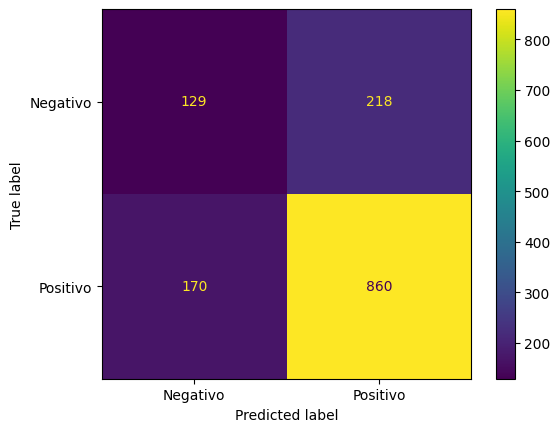

{'Accuracy': 0.7182280319535221, 'Precision': 0.7977736549165121, 'Sensitivity_recall': 0.8349514563106796, 'Specificity': 0.37175792507204614, 'F1_score': 0.8159392789373815}


In [ ]:
# Score_rating vs pipeline
# Generar datos de ejemplo de etiquetas reales y predichas
actual = df_dum['score_dummy']
predicted = df_dum['pipeline_dummy']

# Crear la matriz de confusión utilizando sklearn
confusion_matrix = metrics.confusion_matrix(actual, predicted)

# Crear la visualización de la matriz de confusión
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Negativo", "Positivo"])

# Graficar la matriz de confusión
cm_display.plot()
plt.show()

#Exactitud
Accuracy = metrics.accuracy_score(actual, predicted)

#Precisión
Precision = metrics.precision_score(actual, predicted)

#Sensibilidad/recall
Sensitivity_recall = metrics.recall_score(actual, predicted)

#Especificidad
Specificity = metrics.recall_score(actual, predicted, pos_label=0)

#F Score
F1_score = metrics.f1_score(actual, predicted)

#metrics
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

In [ ]:
print(classification_report(actual, predicted))

              precision    recall  f1-score   support

           0       0.43      0.37      0.40       347
           1       0.80      0.83      0.82      1030

    accuracy                           0.72      1377
   macro avg       0.61      0.60      0.61      1377
weighted avg       0.71      0.72      0.71      1377



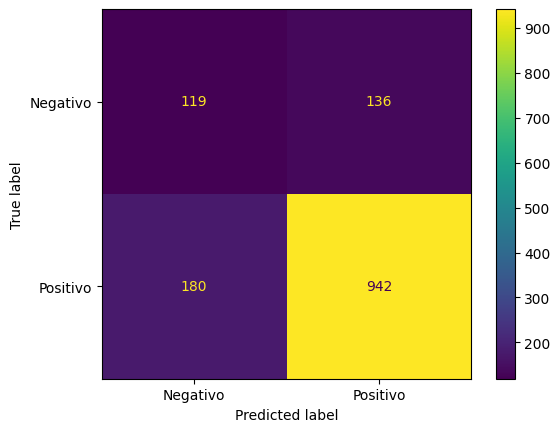

{'Accuracy': 0.7705156136528686, 'Precision': 0.8738404452690167, 'Sensitivity_recall': 0.839572192513369, 'Specificity': 0.4666666666666667, 'F1_score': 0.8563636363636364}


In [ ]:
# Vader vs pipeline
# Generar datos de ejemplo de etiquetas reales y predichas
actual = df_dum['vader_dummy']
predicted = df_dum['pipeline_dummy']

# Crear la matriz de confusión utilizando sklearn
confusion_matrix = metrics.confusion_matrix(actual, predicted)

# Crear la visualización de la matriz de confusión
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Negativo", "Positivo"])

# Graficar la matriz de confusión
cm_display.plot()
plt.show()

#Exactitud
Accuracy = metrics.accuracy_score(actual, predicted)

#Precisión
Precision = metrics.precision_score(actual, predicted)

#Sensibilidad/recall
Sensitivity_recall = metrics.recall_score(actual, predicted)

#Especificidad
Specificity = metrics.recall_score(actual, predicted, pos_label=0)

#F Score
F1_score = metrics.f1_score(actual, predicted)

#metrics
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

In [ ]:
print(classification_report(actual, predicted))

              precision    recall  f1-score   support

           0       0.40      0.47      0.43       255
           1       0.87      0.84      0.86      1122

    accuracy                           0.77      1377
   macro avg       0.64      0.65      0.64      1377
weighted avg       0.79      0.77      0.78      1377

